In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("homeprices_banglore.csv")

In [3]:
df.sample(5)

,area,bedrooms,price
13,1100,2,40.00
12,1000,2,38.00
8,1310,3,50.00
11,2785,4,140.00
0,1056,2,39.07


In [4]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))

In [5]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [6]:
scaled_Y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_Y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [7]:
def batch_gradient_descent(x,y_true,epoch,learning_rate=0.01):
    number_of_feature =x.shape[1]
    w = np.ones(shape =(number_of_feature))
    b = 0
    total_sample = x.shape[0]
    cost_list  = []
    epoch_list = []
    for i in range(epoch):
        y_predicted = np.dot(w,x.T) + b # w1* area + w2 *bedrooms + b
        w_grad = -(2/total_sample)*(x.T.dot(y_true-y_predicted))
        b_grad = -(2/total_sample)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
#             print(f'Epoch :{i} Cost : {cost}')
            
    return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [8]:
number_of_feature =scaled_X.shape[1]
print(number_of_feature)

2


In [9]:
np.dot(w,scaled_X.T)

array([0.23106335, 0.9448289 , 0.49333773, 0.51308845, 0.26617575,
       0.25886067, 0.97701526, 1.11551416, 0.46163904, 1.38168991,
       0.58111872, 0.98993858, 0.21740853, 0.24179214, 0.69084495,
       0.26007985, 0.42994035, 0.51772134, 0.81763972, 0.        ])

In [10]:
scaled_X.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [11]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

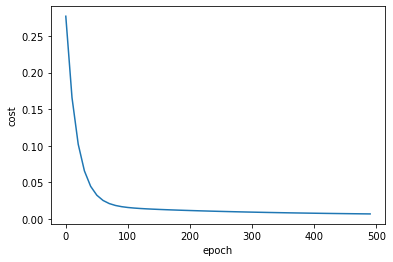

In [12]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [13]:
w

array([0.70712464, 0.67456527])

In [14]:
def predict(area,bedroom,w,b):
    scaled_X = sx.transform([[area,bedroom]])[0]
    scaled_price = w[0]*scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])

predict(2600,4,w,b)


array([[128.45484403]])

In [15]:
predict(1000,2,w,b)

array([[30.25309446]])

In [16]:
predict(1500,3,w,b)

array([[69.47860786]])

In [17]:
predict(2000,3,w,b)

array([[85.93754351]])

In [18]:
import random
random.randint(0,6)

1

In [19]:
def stochastic_gradient_descent(x,y_true,epoch,learning_rate=0.01):
    number_of_feature =x.shape[1]
    w = np.ones(shape =(number_of_feature))
    b = 0
    total_sample = x.shape[0]
    cost_list  = []
    epoch_list = []
    for i in range(epoch):
        random_index = random.randint(0,total_sample-1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w,sample_x.T) + b
        
        w_grad = -(2/total_sample)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_sample)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
#             print(f'Epoch :{i} Cost : {cost}')
            
    return w,b,cost,cost_list,epoch_list

w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),10000)
w_sgd,b_sgd,cost_sgd

(array([0.70652783, 0.67344274]), -0.23094525636048782, 0.00033010920524191036)

In [20]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

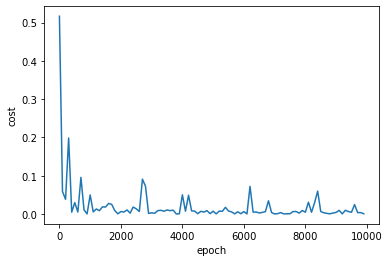

In [21]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

In [22]:
def mini_gradient_descent(x,y_true,epoch = 100,batch_size =5,learning_rate=0.01):
    number_of_feature =x.shape[1]
    w = np.ones(shape =(number_of_feature))
    b = 0
    total_sample = x.shape[0]
    cost_lists  = []
    epoch_lists = []
    
    if batch_size > total_sample:
        batch_size = total_sample
        
    num_batches = int(total_sample/batch_size)

    for i in range(epoch):
        random_index = np.random.permutation(total_sample)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        
        for j in range(0,total_sample,batch_size):
            Xj = sample_x[j:j+batch_size]
            yj = sample_y[j:j+batch_size]
            y_predicted = np.dot(w,Xj.T) + b
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)

            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

            cost = np.mean(np.square(yj-y_predicted))

        if i%100 == 0:
            cost_lists.append(cost)
            epoch_lists.append(i)
#             print(f'Epoch :{i} Cost : {cost}')
            
    return w,b,cost,cost_list,epoch_list

w_md,b_md,cost_md,cost_lists,epoch_lists = mini_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),epoch=120,batch_size=5)
w_md,b_md,cost_md

(array([0.71006877, 0.67801795]), -0.23365034239145271, 0.0033428871198597577)

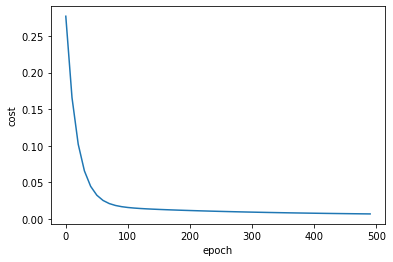

In [23]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_lists,cost_lists)